In [ ]:
#Karkhana.io Assignment
#Chipirishetti Saikiran
#9573800661

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Surface Area ≈ 2.517536
Edge Length ≈ 6.335816


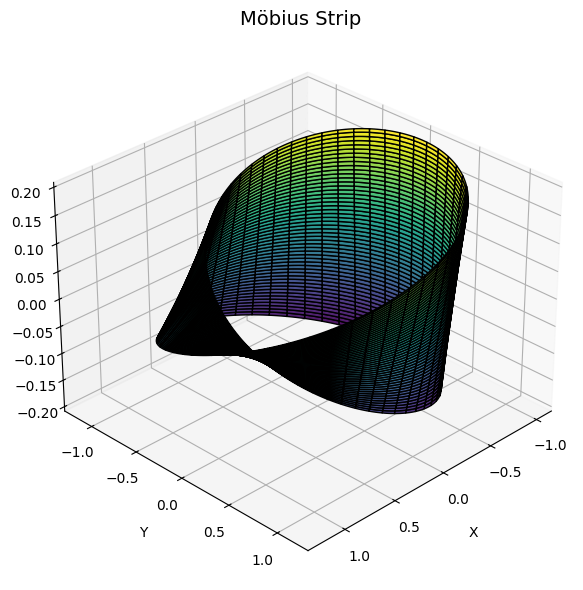

In [3]:
class MobiusStrip:

    def __init__(self, R=1.0, w=0.2, n=100):
        self.R = R
        self.w = w
        self.n = n

        self.u = np.linspace(0, 2 * np.pi, self.n)
        self.v = np.linspace(-self.w / 2, self.w / 2, self.n)
        self.U, self.V = np.meshgrid(self.u, self.v)

        self.X, self.Y, self.Z = self._compute_coordinates()

    def _compute_coordinates(self):
        u, v, R = self.U, self.V, self.R

        x = (R + v * np.cos(u / 2)) * np.cos(u)
        y = (R + v * np.cos(u / 2)) * np.sin(u)
        z = v * np.sin(u / 2)

        return x, y, z

    def surface_area(self):

        du = (2 * np.pi) / self.n
        dv = self.w / self.n


        dx_du = (
            - (self.R + self.V * np.cos(self.U / 2)) * np.sin(self.U)
            - (self.V / 2) * np.sin(self.U / 2) * np.cos(self.U)
        )
        dy_du = (
            (self.R + self.V * np.cos(self.U / 2)) * np.cos(self.U)
            - (self.V / 2) * np.sin(self.U / 2) * np.sin(self.U)
        )
        dz_du = (self.V / 2) * np.cos(self.U / 2)

        dx_dv = np.cos(self.U / 2) * np.cos(self.U)
        dy_dv = np.cos(self.U / 2) * np.sin(self.U)
        dz_dv = np.sin(self.U / 2)


        cross_mag = np.sqrt(
            (dy_du * dz_dv - dz_du * dy_dv) ** 2 +
            (dz_du * dx_dv - dx_du * dz_dv) ** 2 +
            (dx_du * dy_dv - dy_du * dx_dv) ** 2
        )

        area = np.sum(cross_mag) * du * dv
        return area

    def edge_length(self):

        u = np.linspace(0, 2 * np.pi, self.n)
        v = self.w / 2
        x = (self.R + v * np.cos(u / 2)) * np.cos(u)
        y = (self.R + v * np.cos(u / 2)) * np.sin(u)
        z = v * np.sin(u / 2)


        dx = np.gradient(x)
        dy = np.gradient(y)
        dz = np.gradient(z)
        ds = np.sqrt(dx ** 2 + dy ** 2 + dz ** 2)

        return np.sum(ds)

    def plot(self):

        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')

        ax.plot_surface(self.X, self.Y, self.Z, cmap='viridis', edgecolor='k', alpha=0.95)

        ax.set_title("Möbius Strip", fontsize=14)
        ax.set_xlabel('X', labelpad=10)
        ax.set_ylabel('Y', labelpad=10)
        ax.set_zlabel('Z', labelpad=10)

        ax.view_init(elev=30, azim=45)
        plt.tight_layout()
        plt.show()


if __name__ == "__main__":
    mobius = MobiusStrip(R=1.0, w=0.4, n=300)

    area = mobius.surface_area()
    edge = mobius.edge_length()

    print(f"Surface Area ≈ {area:.6f}")
    print(f"Edge Length ≈ {edge:.6f}")

    mobius.plot()
